# Twitter Data Sentiment Analysis

### Link for study : https://stepupanalytics.com/sentiment-analysis-on-narendra-modis-tweets-using-python/#prettyPhoto

In [1]:
%matplotlib inline
import tweepy
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns


## Creating a twitter app for @user

In [2]:
# Access
acces_token='966289632815144960-7BYnTY1ABbykfiNJNkZtjfhfmJfSsUl'
acces_token_secret='irZDHPTcMNYSikwCI9UohSlayGbGcLVEccvGptwaWOyil'

#Consumer
consumer_key='enMyXDNHgcbBiRMUv9TfPHRW9'
consumer_secret='Yp4e9s856kllbT5JyZYxL1Pk4i88R9Mk9FaJT7rH0nBHlGO3Ks'

In [3]:
# We import our access keys:
 
def twitter_setup():
    
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(acces_token, acces_token_secret)
    
    api = tweepy.API(auth)
    return api

## Tweet Extraction

In [4]:
extractor = twitter_setup()
 
#tweets = extractor.user_timeline(screen_name="NarendraModi", count = 200)
tweets=[tweet for tweet in tweepy.Cursor(extractor.user_timeline,screen_name="NarendraModi").items()]
print("number of tweets extracted: {}.\n".format(len(tweets)))
 
print("5 recent tweets:\n")
for tweet in tweets[:5]:
    print(tweet.text)
    print()

number of tweets extracted: 3210.

5 recent tweets:

The enthusiasm in Latur was unparalleled. People from all sections of society came. Happy to see farmers and women… https://t.co/CVMPBKzWv5

Shri KM Mani was a stalwart of Kerala politics. His impeccable electoral record indicated his deep connect with the… https://t.co/eUkYNgtXmo

Come to Mysuru and see the strong support for BJP! https://t.co/TIPJuQjbor

Hello Karnataka! Beginning the campaign in the state with a massive rally in Chitradurga. Watch. https://t.co/xVTaPm5mgm

RT @JagranNews: डिक्शनरी में जितने कड़वे और गंदे शब्द होंगे वो सब मेरे बारे में बोले गये...! प्रधानमंत्री नरेंद्र मोदी का दैनिक जागरण को दि…



## Creating a (pandas) DataFrame

In [5]:
data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['tweets'])
 
display(data.head(10))

,tweets
0,The enthusiasm in Latur was unparalleled. Peop...
1,Shri KM Mani was a stalwart of Kerala politics...
2,Come to Mysuru and see the strong support for ...
3,Hello Karnataka! Beginning the campaign in the...
4,RT @JagranNews: डिक्शनरी में जितने कड़वे और गं...
5,RT @JagranNews: एक्सक्लूसिव इंटरव्यू में प्रधा...
6,RT @JagranNews: पीएम मोदी ने जागरण को दिए इंटर...
7,सेक्युलरिज्म के नाम पर सम्प्रदायवाद करने वालों...
8,"गरीबों के नाम पर हमने राजनीति नहीं की, काम किय..."
9,Euphoric atmosphere in Latur. Addressing a lar...


In [6]:
data.columns,data.shape,data.dtypes,data.head()

(Index(['tweets'], dtype='object'), (3210, 1), tweets    object
 dtype: object,                                               tweets
 0  The enthusiasm in Latur was unparalleled. Peop...
 1  Shri KM Mani was a stalwart of Kerala politics...
 2  Come to Mysuru and see the strong support for ...
 3  Hello Karnataka! Beginning the campaign in the...
 4  RT @JagranNews: डिक्शनरी में जितने कड़वे और गं...)

In [7]:
# We print info from the first tweet:
 
print(tweets[0].id)
print(tweets[0].created_at)
print(tweets[0].source)
print(tweets[0].favorite_count)
print(tweets[0].retweet_count)
print(tweets[0].geo)
print(tweets[0].coordinates)
print(tweets[0].entities)

1115595470733058049
2019-04-09 12:41:01
Twitter Web Client
329
86
None
None
{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/CVMPBKzWv5', 'expanded_url': 'https://twitter.com/i/web/status/1115595470733058049', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [116, 139]}]}


In [9]:
# We add relevant data
data['len'] = np.array([len(tweet.text) for tweet in tweets])
data['ID'] = np.array([tweet.id for tweet in tweets])
data['Date'] = np.array([tweet.created_at for tweet in tweets])
data['Source'] = np.array([tweet.source for tweet in tweets])
data['Likes'] = np.array([tweet.favorite_count for tweet in tweets])
data['RTs'] = np.array([tweet.retweet_count for tweet in tweets])

In [10]:
display(data.head(10))

,tweets,len,ID,Date,Source,Likes,RTs
0,The enthusiasm in Latur was unparalleled. Peop...,139,1115595470733058049,2019-04-09 12:41:01,Twitter Web Client,329,86
1,Shri KM Mani was a stalwart of Kerala politics...,140,1115594810063110144,2019-04-09 12:38:24,Twitter Web Client,1055,231
2,Come to Mysuru and see the strong support for ...,74,1115582160486854657,2019-04-09 11:48:08,Periscope,5972,1663
3,Hello Karnataka! Beginning the campaign in the...,120,1115546843251785728,2019-04-09 09:27:47,Periscope,10203,2988
4,RT @JagranNews: डिक्शनरी में जितने कड़वे और गं...,140,1115529318967332864,2019-04-09 08:18:09,Twitter Web Client,0,2125
5,RT @JagranNews: एक्सक्लूसिव इंटरव्यू में प्रधा...,140,1115529251225137153,2019-04-09 08:17:53,Twitter Web Client,0,897
6,RT @JagranNews: पीएम मोदी ने जागरण को दिए इंटर...,140,1115529207885381632,2019-04-09 08:17:43,Twitter Web Client,0,1380
7,सेक्युलरिज्म के नाम पर सम्प्रदायवाद करने वालों...,140,1115528889705480194,2019-04-09 08:16:27,Twitter Web Client,15031,4783
8,"गरीबों के नाम पर हमने राजनीति नहीं की, काम किय...",140,1115527857097269248,2019-04-09 08:12:21,Twitter Web Client,14003,3899
9,Euphoric atmosphere in Latur. Addressing a lar...,86,1115496903087497216,2019-04-09 06:09:21,Periscope,13181,3971


In [11]:
data.to_csv('Narendra_Modi_Latest')
data.columns

Index(['tweets', 'len', 'ID', 'Date', 'Source', 'Likes', 'RTs'], dtype='object')

In [12]:
# Visualization and basic stats
 
# We extract the mean of length
 
mean = np.mean(data['len'])
print("the length's average in tweets: {}".format(mean))

the length's average in tweets: 128.28380062305297


In [13]:
# We extract the tweet with more FAVs and mote RTs:
 
fav_max = np.max(data['Likes'])
rt_max = np.max(data['RTs'])
 
fav = data[data.Likes == fav_max].index[0]
rt = data[data.RTs == rt_max].index[0]
 
# Max FAVs:
print("the tweet with more likes is: \n{}".format(data['tweets'][fav]))
print("Number of likes: {}".format(fav_max))
print("{} character.\n".format(data['len'][fav]))
 
# Max RTs:
print("The tweet with more retweets is: \n{}".format(data['tweets'][rt]))
print("Number of retweets: {}".format(rt_max))
print("{} character.\n".format(data['len'][rt]))

the tweet with more likes is: 
Welcome Home Wing Commander Abhinandan!

The nation is proud of your exemplary courage.

Our armed forces are an in… https://t.co/M8gC4mWWFX
Number of likes: 271609
140 character.

The tweet with more retweets is: 
Welcome Home Wing Commander Abhinandan!

The nation is proud of your exemplary courage.

Our armed forces are an in… https://t.co/M8gC4mWWFX
Number of retweets: 66235
140 character.



In [14]:
tlen = pd.Series(data = data['len'].values)   #, index=data['Data'])
tfav = pd.Series(data = data['Likes'].values)   #, index=data['Data'])
tret = pd.Series(data = data['RTs'].values) #, index=data['Data']

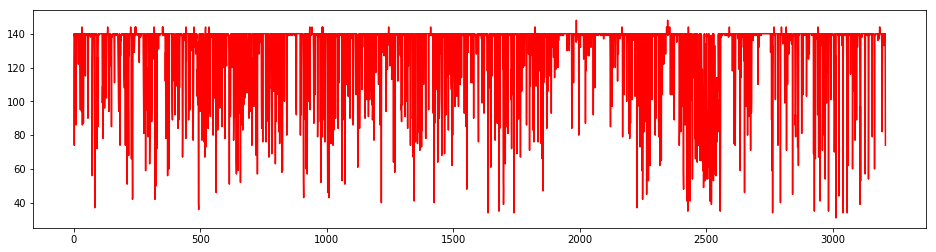

In [15]:
# Lenghts along time:
tlen.plot(figsize=(16,4), color='r');

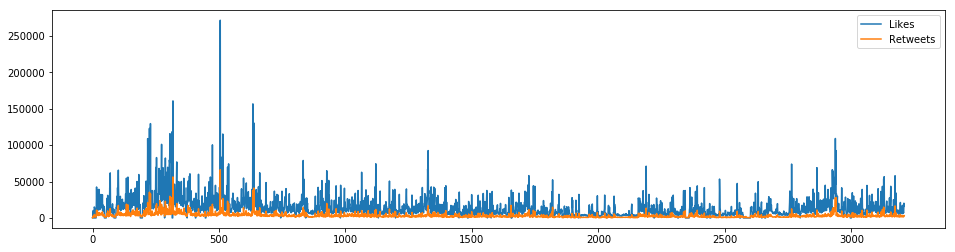

In [16]:
# Likes vs retweets visualization:
tfav.plot(figsize=(16,4), label="Likes", legend=True)
tret.plot(figsize=(16,4), label="Retweets", legend=True);

## Pie Chart of Sources

In [17]:
# We obtain all possible sources:
sources = []
for source in data['Source']:
    if source not in sources:
        sources.append(source)
 
# We print sources list:
print("Creation of content sources:")
for source in sources:
    print("* {}".format(source))

Creation of content sources:
* Twitter Web Client
* Periscope
* Twitter for iPhone
* Twitter Media Studio
* Twitter for Android
* Twitter Ads Composer


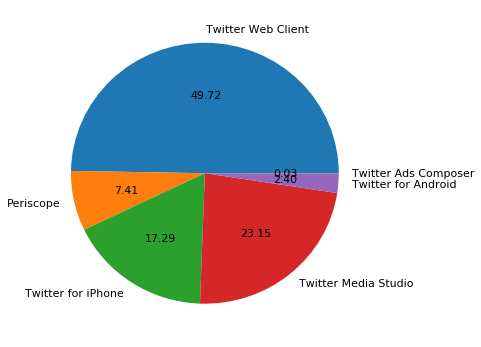

In [18]:
# We create a numpy vector mapped to labels:
percent = np.zeros(len(sources))
 
for source in data['Source']:
    for index in range(len(sources)):
        if source == sources[index]:
            percent[index] += 1
            pass
 
percent /= 100
 
# Pie chart:
pie_chart = pd.Series(percent, index=sources,name='')
pie_chart.plot.pie(fontsize=11, autopct='%.2f', figsize=(6, 6));

# Sentiment Analysis

In [19]:
import textblob
import re
 
def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing 
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())
 
def analize_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = textblob.TextBlob(clean_tweet(tweet))
    #return str(analysis.sentiment.polarity)
    if analysis.sentiment.polarity == 0:
        return 0
    elif analysis.sentiment.polarity > 0:
        return 1
    else:
        return -1

In [20]:
l=[]
for tweet in data['tweets']:
    l.append(analize_sentiment(tweet))

In [21]:
data['SA']=np.array(l)

In [22]:
data.head()

,tweets,len,ID,Date,Source,Likes,RTs,SA
0,The enthusiasm in Latur was unparalleled. Peop...,139,1115595470733058049,2019-04-09 12:41:01,Twitter Web Client,329,86,1
1,Shri KM Mani was a stalwart of Kerala politics...,140,1115594810063110144,2019-04-09 12:38:24,Twitter Web Client,1055,231,1
2,Come to Mysuru and see the strong support for ...,74,1115582160486854657,2019-04-09 11:48:08,Periscope,5972,1663,1
3,Hello Karnataka! Beginning the campaign in the...,120,1115546843251785728,2019-04-09 09:27:47,Periscope,10203,2988,0
4,RT @JagranNews: डिक्शनरी में जितने कड़वे और गं...,140,1115529318967332864,2019-04-09 08:18:09,Twitter Web Client,0,2125,0


## Analyzing the result

In [23]:
# We construct lists with classified tweets:
 
pos_tweets = [ tweet for index, tweet in enumerate(data['tweets']) if data['SA'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(data['tweets']) if data['SA'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(data['tweets']) if data['SA'][index] < 0]

In [24]:
# We print percentages:
 
print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(data['tweets'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(data['tweets'])))
print("Percentage of negative tweets: {}%".format(len(neg_tweets)*100/len(data['tweets'])))

Percentage of positive tweets: 46.04361370716511%
Percentage of neutral tweets: 47.78816199376947%
Percentage of negative tweets: 6.168224299065421%


In [25]:
p=(len(pos_tweets)*100/len(data['tweets']))
ne=(len(neu_tweets)*100/len(data['tweets']))
n=(len(neg_tweets)*100/len(data['tweets']))

In [26]:
d=[p,ne,n]
l=['Positive Sentiments','Neutral_Sentiments','Negative_Sentiments']

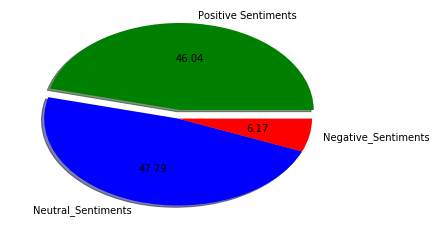

In [27]:
plt.pie(d,labels=l,autopct="%0.2f",shadow=True,explode=(0.1,0,0),colors=['green','blue','red'])
#plt.title("Sentiment Analysis on PM Narendra Modi's Tweets",size=25)
plt.show()


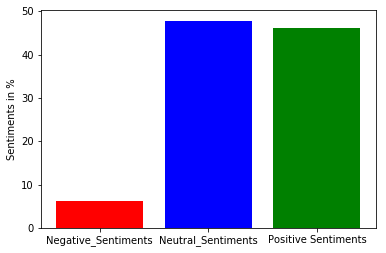

In [28]:
plt.bar(l,d,color=['green','blue','red'])
#plt.title("Sentiment Analysis on PM Narendra Modi's Tweets",size=15)
plt.ylabel("Sentiments in %")
plt.show()